In [1]:
# MODULOS
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# DATASETS

# El catalogo se conforma por aquellos ejercicios de programacion que estaban disponibles en la pagina web.
df_catalogo = pd.read_csv("../data/catalogo.csv", sep=";", encoding="latin1")

# La data_a son resgistros generales de los estudiantes durantes el semestre, es deicr, datos del curso en general.
df_data_a = pd.read_csv("../data/dataset_a.csv", sep=";", encoding="latin1")

# La data_a_2021 son resgitros globales de los estudiantes al tratar de realizar los ejercicios de la pagina web.
df_data_2021 = pd.read_csv("../data/dataset_a_2021.csv", sep=";", encoding="latin1")

## DISTRIBUCIÓN DE LOS DATOS

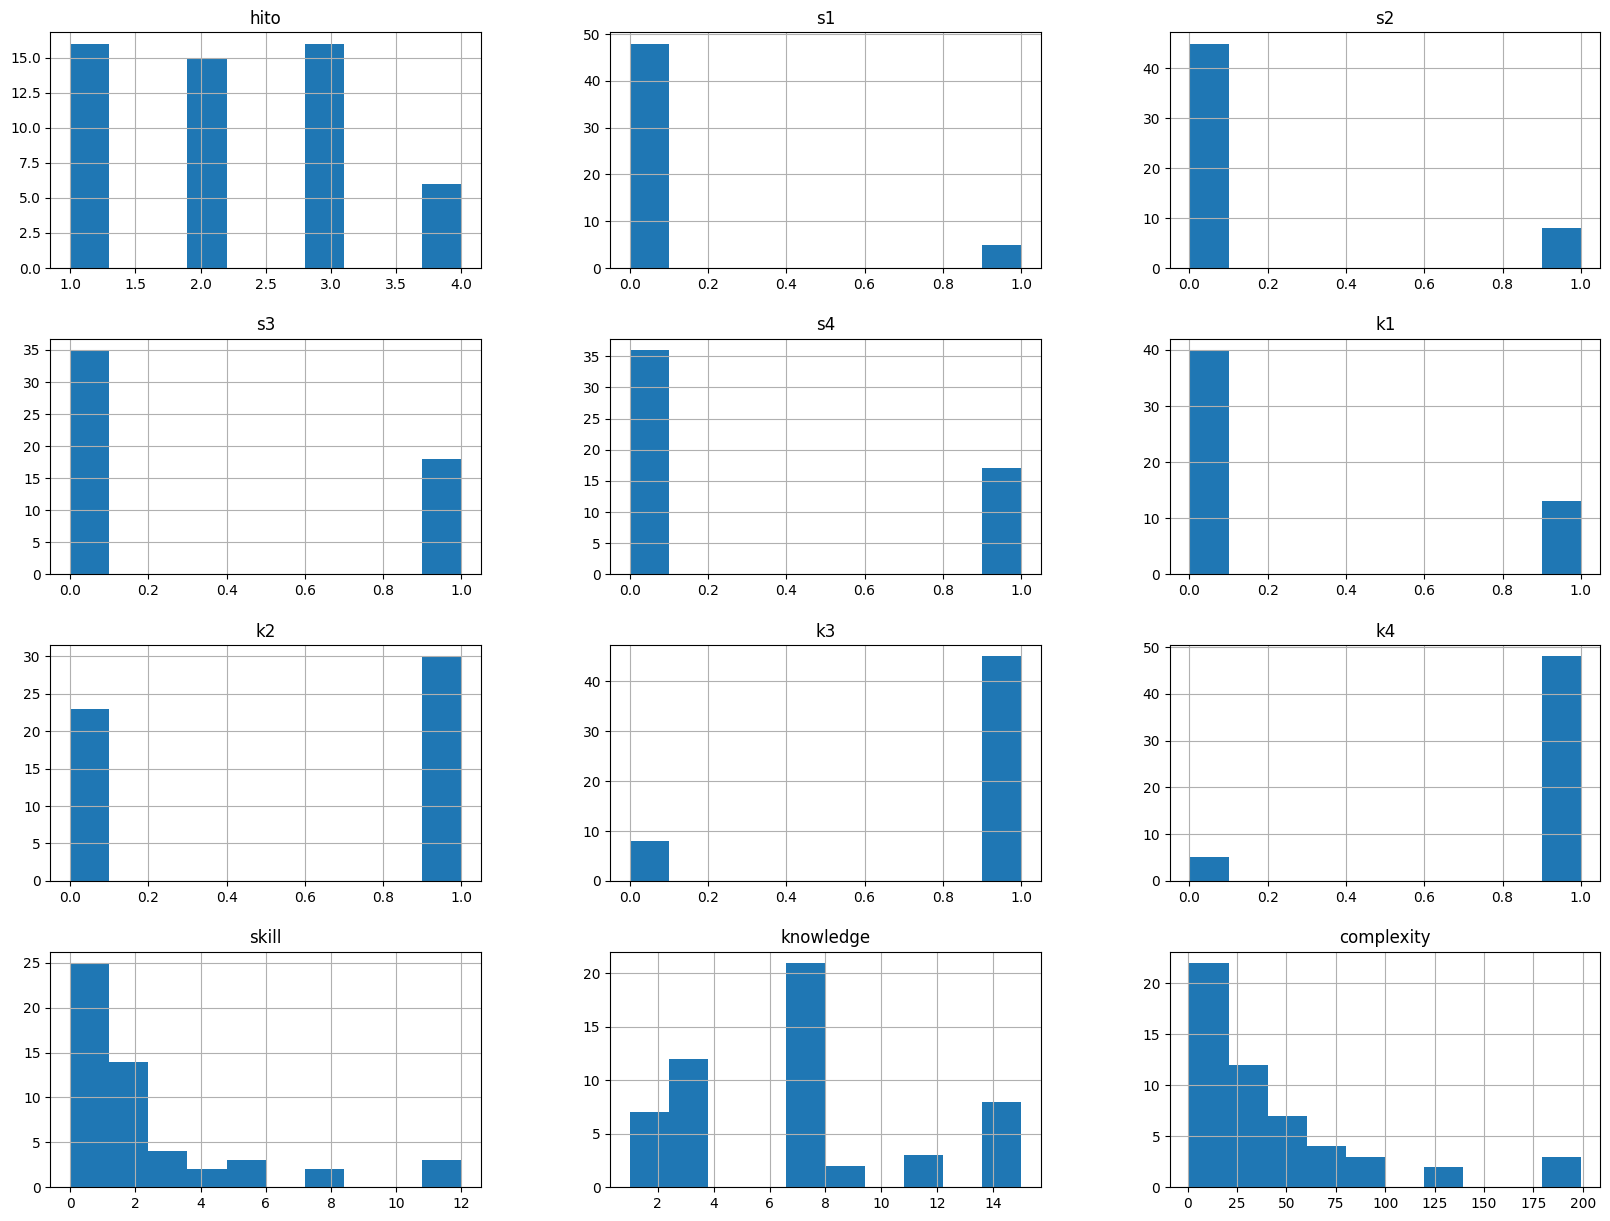

In [3]:
# CATALOGO  
df_catalogo.hist(figsize=(20, 15))
plt.show()

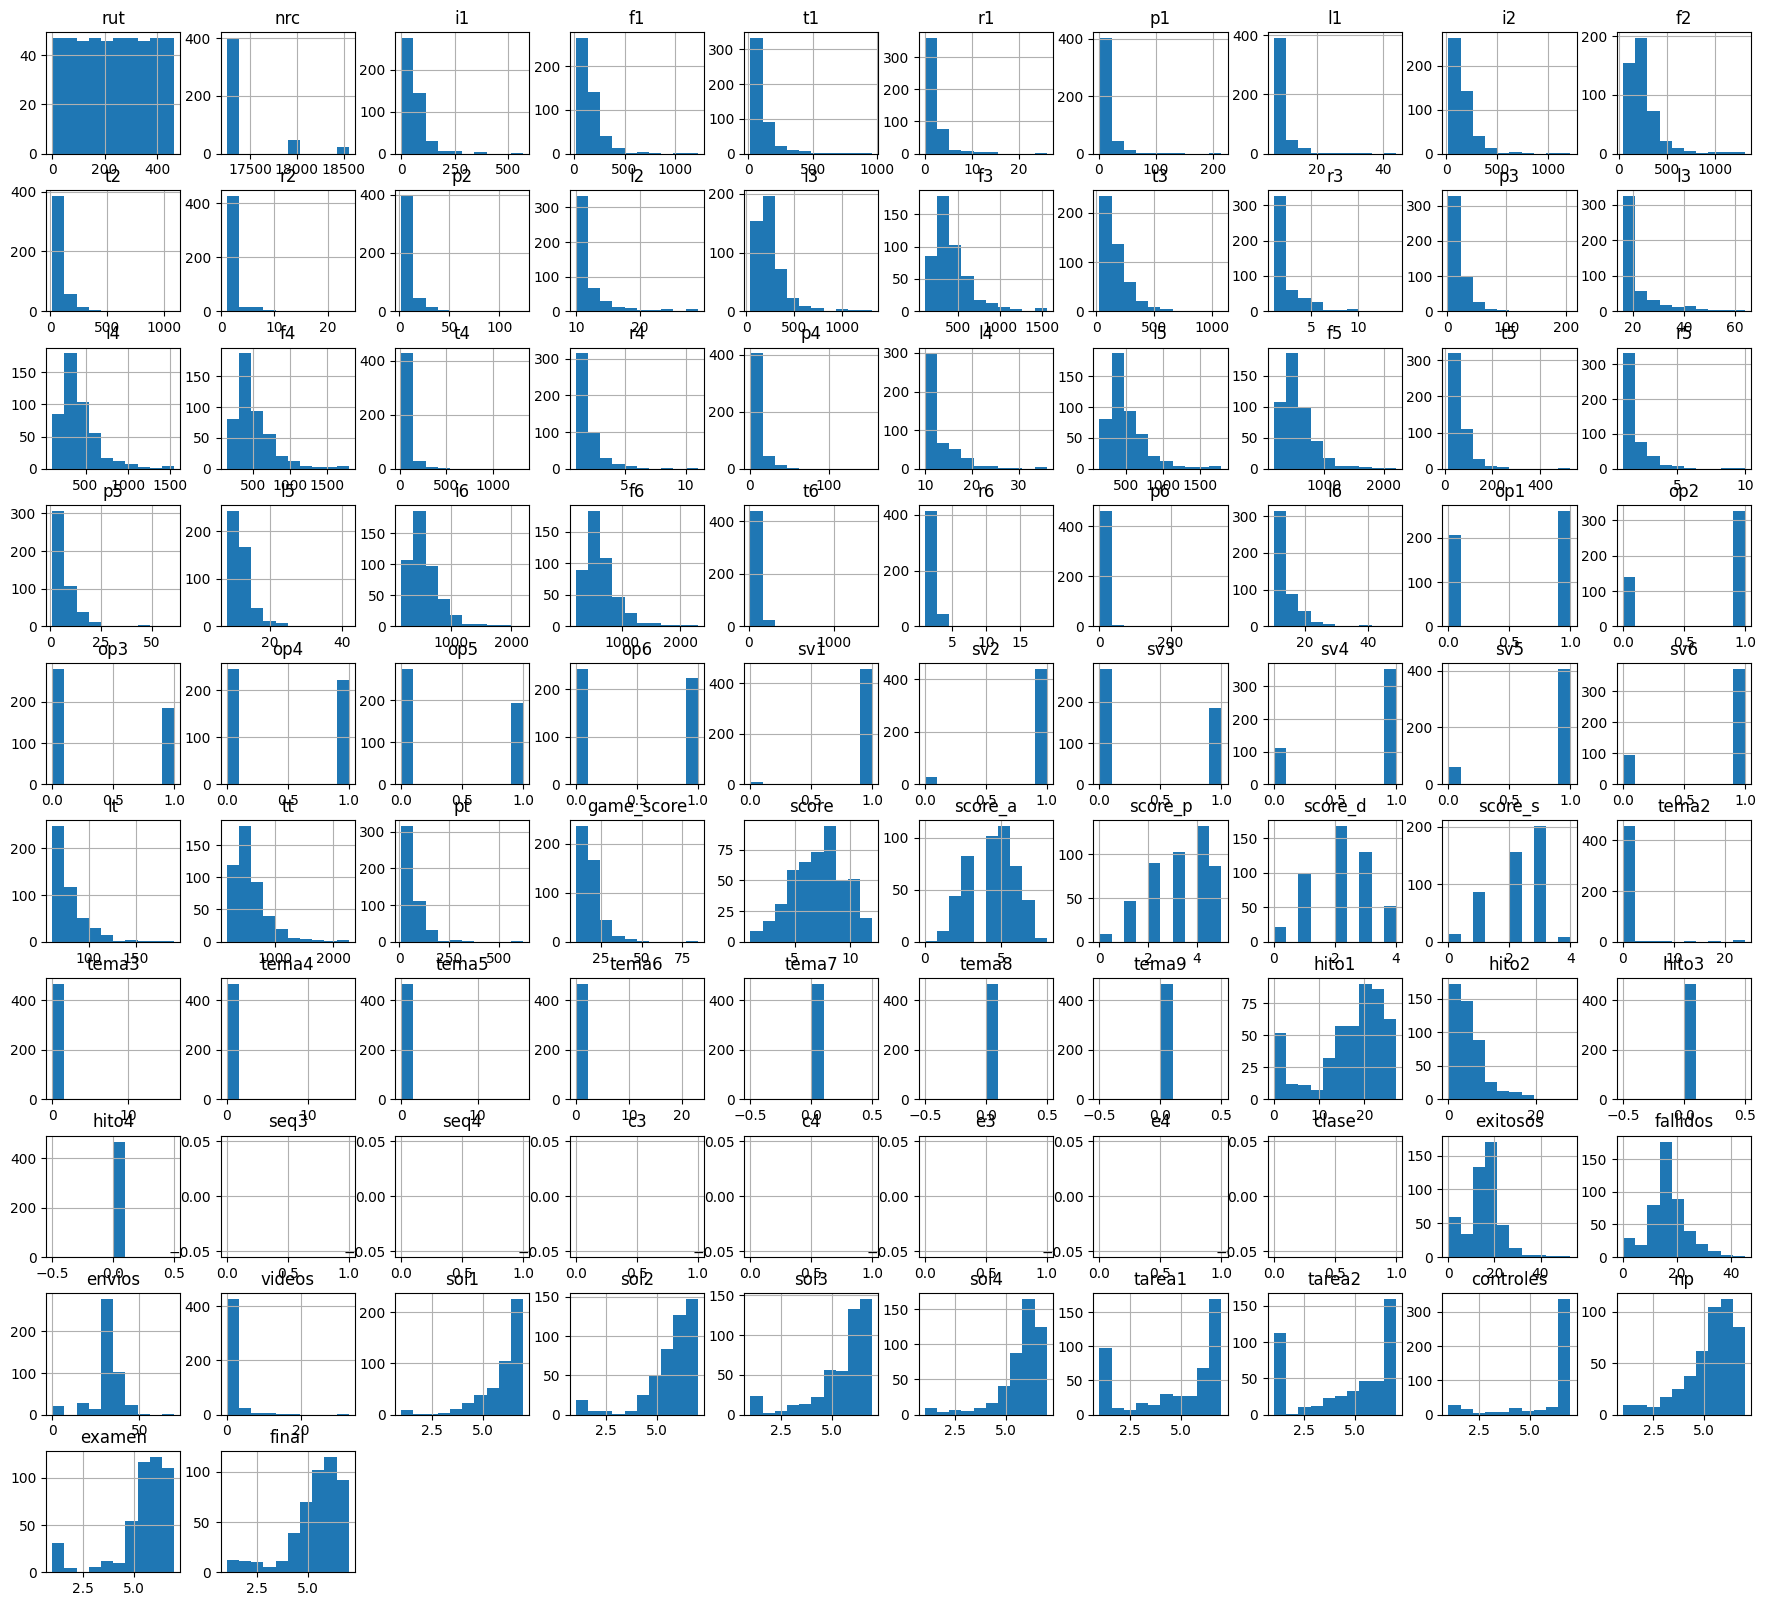

In [4]:
# DATA_A
df_data_a.hist(figsize=(22, 20))
plt.show()

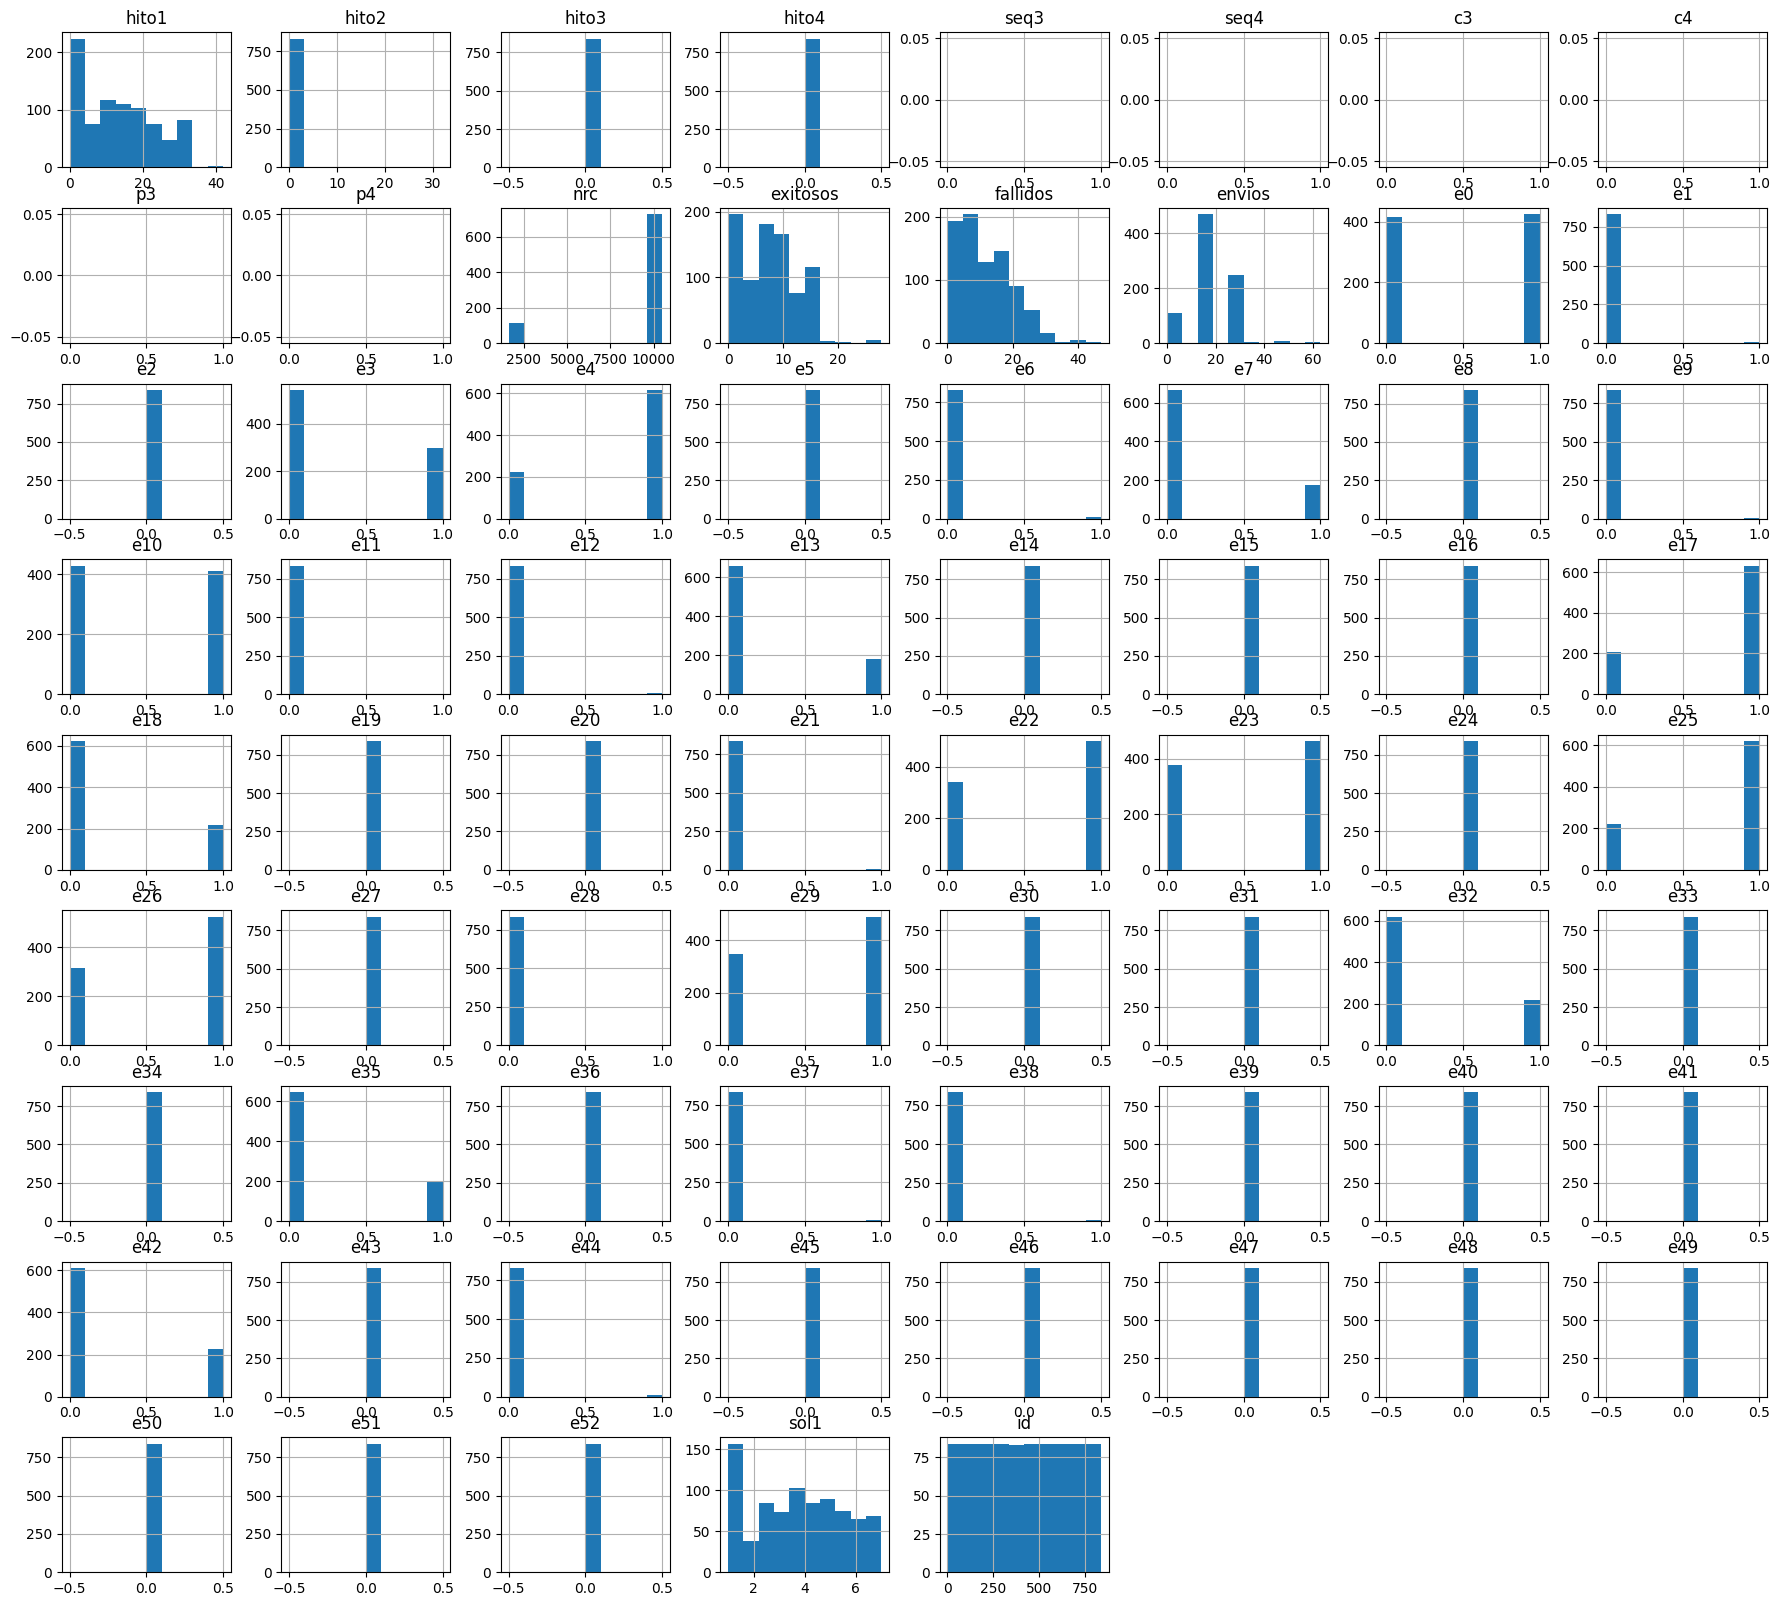

In [5]:
# DATA_A_2021
df_data_2021.hist(figsize=(22, 20))
plt.show()

## GRAFICOS DE ESTUDIO

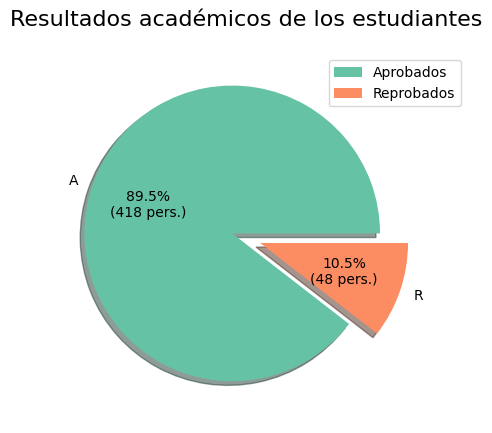

In [6]:
notas = df_data_a['estado'].value_counts()

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} pers.)".format(pct, absolute)

fig, ax = plt.subplots()
pie = ax.pie(
    notas.values,
    labels=notas.index,
    autopct=lambda pct: func(pct, notas.values),
    labeldistance=1.1,
    colors=sns.color_palette('Set2'),
    explode=(0.1, 0.1),
    shadow=True
)

ax.set_title(
    label="Resultados académicos de los estudiantes", 
    fontdict={"fontsize":16},
    pad=20
)

ax.legend(pie[0], ["Aprobados", "Reprobados"], loc="upper right",  bbox_to_anchor=(1.1, 1))
plt.show()

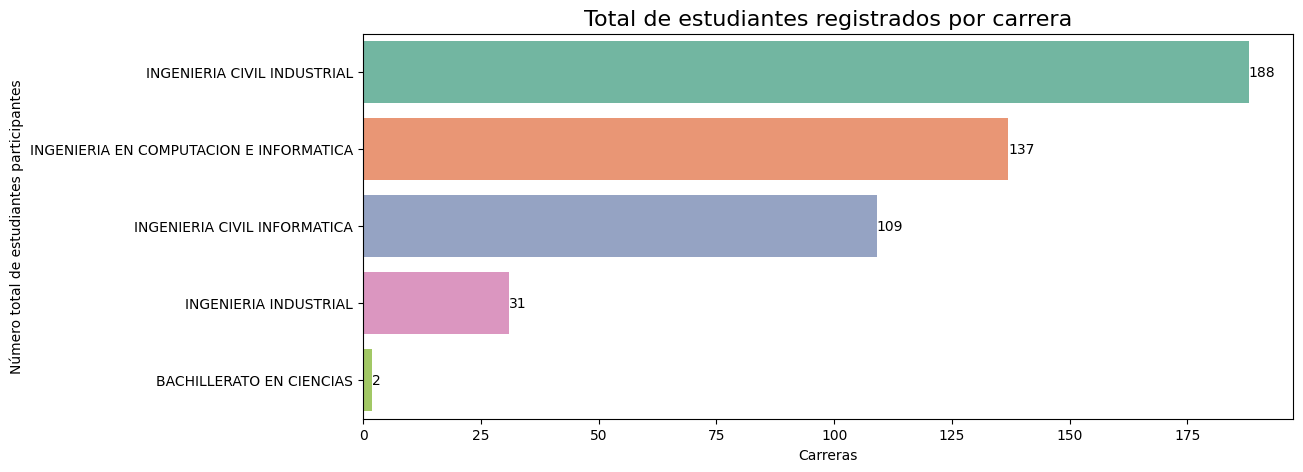

In [7]:
carreras = df_data_a['programa'].value_counts()
fig, ax = plt.subplots(figsize=(12, 5))  
sns.barplot(x=carreras.values, y=carreras.index, orient='h', hue=carreras.index, palette='Set2', dodge=False, ax=ax)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Total de estudiantes registrados por carrera', fontsize=16)
plt.xlabel('Carreras')
plt.ylabel('Número total de estudiantes participantes')
plt.show()

In [8]:
aprobados_por_programa = df_data_a[df_data_a['estado'] == 'A'].groupby('programa').size()
reprobados_por_programa = df_data_a[df_data_a['estado'] == 'R'].groupby('programa').size()

programa_df = pd.DataFrame({'Aprobados': aprobados_por_programa, 'Reprobados': reprobados_por_programa})
programa_df.fillna(0.0, inplace=True)
programa_df = programa_df.astype(int)
programa_df

,Aprobados,Reprobados
programa,,
BACHILLERATO EN CIENCIAS,2,0
INGENIERIA CIVIL INDUSTRIAL,179,9
INGENIERIA CIVIL INFORMATICA,99,10
INGENIERIA EN COMPUTACION E INFORMATICA,114,23
INGENIERIA INDUSTRIAL,24,7


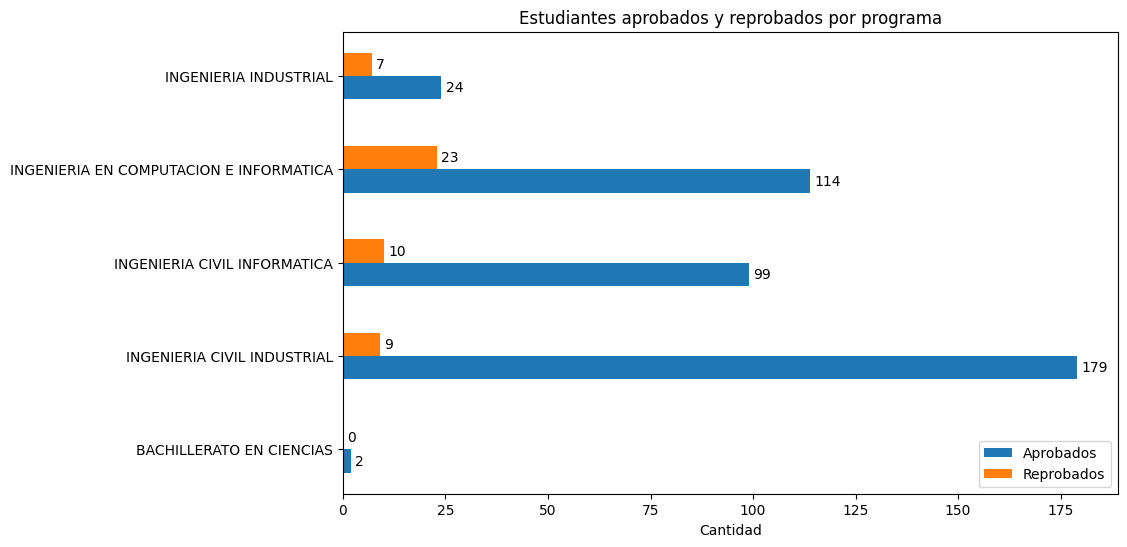

In [9]:
programa_df = programa_df.astype(int)   # Aseguramos que todos los valores sean enteros
y = np.arange(len(programa_df.index))   # las ubicaciones de las etiquetas
height = 0.25                           # la altura de las barras
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6))

for attribute, measurement in programa_df.to_dict().items():
    offset = height * multiplier
    rects = ax.barh(y + offset, measurement.values(), height, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Añadir algunos textos para etiquetas, título y etiquetas personalizadas del eje x, etc.
ax.set_xlabel('Cantidad')
ax.set_title('Estudiantes aprobados y reprobados por programa')
ax.set_yticks(y + height / 2)
ax.set_yticklabels(programa_df.index)
ax.legend(loc='lower right')
ax.set_xlim(0, programa_df.max().max() + 10)  # Ajuste de límites del eje x

plt.show()

In [10]:
# Suponiendo que 'df_data_2021' es tu DataFrame
df_data_2021['sol1'] = df_data_2021['sol1'].astype(float)
df_data_2021['sol1'].unique()
# Suponiendo que df_data_2021 ya esté cargado y contenga los datos
rangos = [(1.0, 1.9), (2.0, 2.9), (3.0, 3.9), (4.0, 4.9), (5.0, 5.9), (6.0, 6.9), (7.0, 7.1)]

def contar_personas_en_rango(df, rango):
  rango_inferior, rango_superior = rango
  return df[(df['sol1'] >= rango_inferior) & (df['sol1'] < rango_superior)].shape[0]

conteo_por_rango = []
for rango in rangos:
  conteo = contar_personas_en_rango(df_data_2021, rango)
  conteo_por_rango.append((rango, conteo))

for rango, conteo in conteo_por_rango:
  rango_inferior, rango_superior = rango
  print(f"Rango: {rango_inferior:.1f} - {rango_superior:.1f}: {conteo} personas")

Rango: 1.0 - 1.9: 184 personas
Rango: 2.0 - 2.9: 132 personas
Rango: 3.0 - 3.9: 130 personas
Rango: 4.0 - 4.9: 133 personas
Rango: 5.0 - 5.9: 124 personas
Rango: 6.0 - 6.9: 77 personas
Rango: 7.0 - 7.1: 27 personas


<Axes: xlabel='sol1', ylabel='Count'>

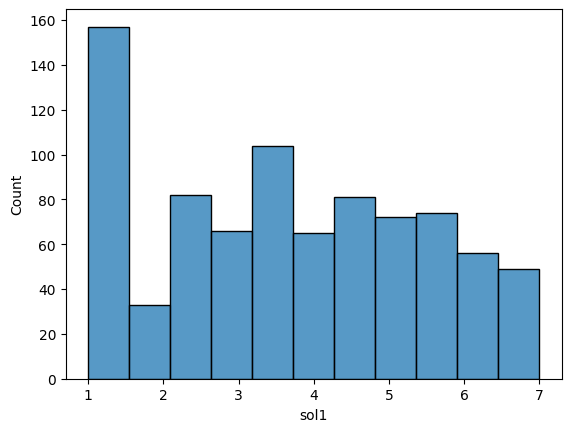

In [11]:
sns.histplot(df_data_2021['sol1'])

<Axes: xlabel='np', ylabel='Count'>

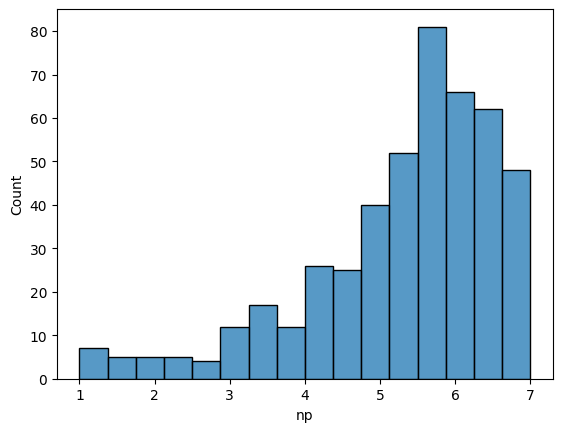

In [12]:
sns.histplot(data=df_data_a, x='np')

<Axes: xlabel='knowledge', ylabel='Count'>

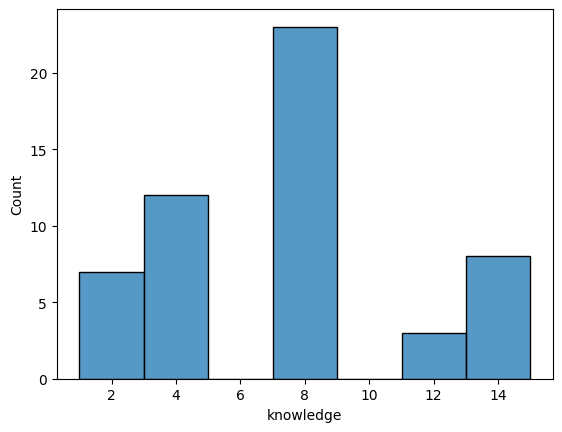

In [13]:
sns.histplot(data=df_catalogo, x='knowledge')